OLORUNHUNDO OLUSEYI


STREAMLIT 1 CHECKPOINT

# **Instructions**

1. Install the necessary packages
2. Import you data and perform basic data exploration phase
        #Display general information about the dataset
        #Create a pandas profiling reports to gain insights into the dataset
        #Handle Missing and corrupted values
        #Remove duplicates, if they exist
        #Handle outliers, if they exist
        #Encode categorical features
3. Based on the previous data exploration train and test a machine learning classifier
3. Create a streamlit application (locally)
4. Add input fields for your features and a validation button at the end of the form
5. Import your ML model into the streamlit application and start making predictions given the provided features values


Note:

This checkpoint should be done locally, (Google colab notebooks won't work)
Make sure to run the app using the "streamlit run" command in your terminal.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv('/content/expresso_processed.csv')
data

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64371,34995,K > 24 month,2300.0,10.0,2224.0,741.0,25.0,1441.0,3.0,NO,62,0
64372,34996,K > 24 month,10800.0,27.0,10801.0,3600.0,26.0,11460.0,25.0,NO,45,0
64373,34997,K > 24 month,4000.0,4.0,4007.0,1336.0,5.0,11873.0,3.0,NO,50,0
64374,34998,K > 24 month,13600.0,28.0,14600.0,4867.0,37.0,3676.0,291.0,NO,62,0


In [14]:
data.describe()

,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
count,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.000000,64376.00000,64376.000000,64376.000000
mean,16216.330620,5061.212812,10.630126,5173.670560,1724.561591,13.252718,3252.074189,218.65919,33.197496,0.456319
std,9501.522628,6777.622016,12.490926,6913.023944,2304.338459,13.988994,7841.567790,754.75000,20.432429,0.498092
min,0.000000,50.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000
25%,8046.750000,1000.000000,2.000000,1001.000000,334.000000,3.000000,1.000000,3.00000,14.000000,0.000000
50%,16093.500000,2900.000000,6.000000,2951.000000,984.000000,8.000000,507.000000,15.00000,32.000000,0.000000
75%,24140.250000,6500.000000,14.000000,6699.000000,2233.000000,18.000000,3156.000000,97.00000,54.000000,1.000000
max,34999.000000,286500.000000,133.000000,323541.000000,107847.000000,91.000000,283493.000000,25263.00000,62.000000,1.000000


In [15]:
data.isnull().sum()

Unnamed: 0        0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [ ]:
# text is clean so no further cleaning needed

In [16]:
num = data.select_dtypes(include = 'number')
cat = data.select_dtypes(exclude = 'number')

print(f'Numerical Variables\n')
display(num.head())

print(f'Categorical Variables\n')
display(cat.head())

Numerical Variables



,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


Categorical Variables



,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


In [17]:
data['TENURE'] = data['TENURE'].str.extract(r'(\d+)') # .......... extract all numericals from the column and save it to a new column
data['TENURE'] = data['TENURE'].astype(float) # .................. Turn the new column to a numerical datatype

data.drop(['MRG',], axis = 1, inplace = True)
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,24.0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,24.0,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,24.0,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,18.0,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,24.0,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cat.columns:
    if i in data.columns:
        data[i] = encoder.fit_transform(data[i])

data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,7,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,7,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,7,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,5,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,7,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


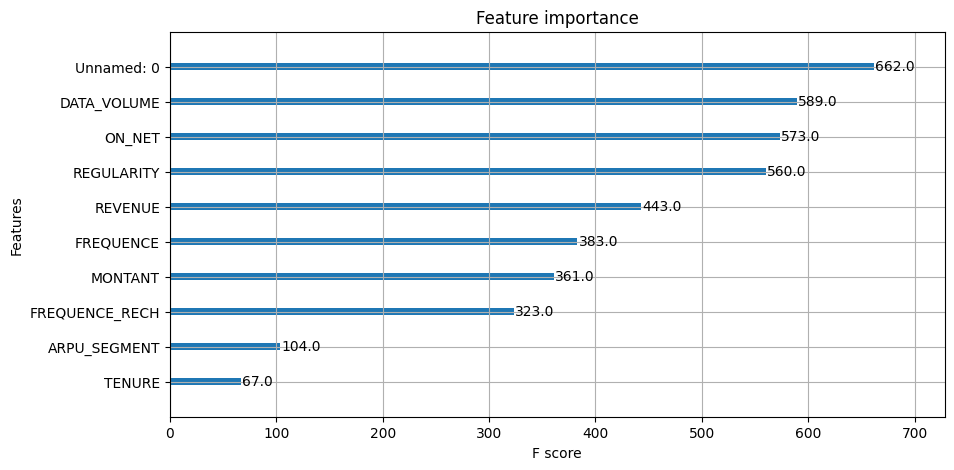

In [19]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()

x = data.drop('CHURN', axis = 1)
y = data.CHURN

model.fit(x, y)

plt.rcParams['figure.figsize'] = (10, 5)
# Print feature importance scores
xgb.plot_importance(model, importance_type= 'weight')
plt.show()

In [21]:
sel_columns = ['DATA_VOLUME', 'ON_NET', 'REGULARITY',
 'REVENUE', 'FREQUENCE', 'MONTANT', 'FREQUENCE_RECH', 'ARPU_SEGMENT', 'TENURE', 'CHURN']

sel_data = data[sel_columns]
sel_data

,DATA_VOLUME,ON_NET,REGULARITY,REVENUE,FREQUENCE,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,TENURE,CHURN
0,266.0,1.0,32,3002.0,8.0,3000.0,4.0,1001.0,7,1
1,4341.0,1.0,29,1980.0,5.0,1500.0,3.0,660.0,7,1
2,2700.0,4.0,49,9639.0,38.0,9850.0,32.0,3213.0,7,1
3,763.0,8.0,1,999.0,2.0,1000.0,2.0,333.0,5,1
4,2955.0,28.0,21,1180.0,3.0,1200.0,3.0,393.0,7,1
...,...,...,...,...,...,...,...,...,...,...
64371,1441.0,3.0,62,2224.0,25.0,2300.0,10.0,741.0,7,0
64372,11460.0,25.0,45,10801.0,26.0,10800.0,27.0,3600.0,7,0
64373,11873.0,3.0,50,4007.0,5.0,4000.0,4.0,1336.0,7,0
64374,3676.0,291.0,62,14600.0,37.0,13600.0,28.0,4867.0,7,0


In [23]:
x = sel_data.drop('CHURN', axis = 1)
y = sel_data.CHURN

# split into train and test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 98, stratify = y)

<Axes: xlabel='CHURN', ylabel='count'>

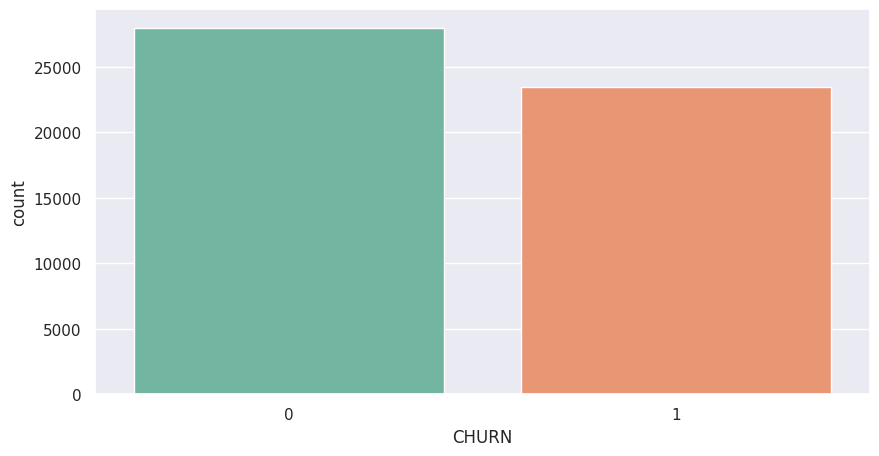

In [24]:
sns.set(style= 'darkgrid')
sns.countplot(x = ytrain, palette = 'Set2')

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


logreg = LogisticRegression()

logreg.fit(xtrain, ytrain)

cross_val = logreg.predict(xtrain)
print(classification_report(cross_val, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     27895
           1       0.75      0.74      0.75     23605

    accuracy                           0.77     51500
   macro avg       0.77      0.77      0.77     51500
weighted avg       0.77      0.77      0.77     51500



<hr>
<h3><b>Random oversampling using Synthetic Minority Oversampling Technique (SMOTE)

In [26]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'auto', random_state=56)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

In [27]:
# To get the best random state to use
score = []
for i in range(100):
    smote = SMOTE(sampling_strategy= 'auto', random_state = i)
    X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

    test_model = LogisticRegression()
    test_model.fit(X_resampled, y_resampled)

    cross_val = test_model.predict(X_resampled)
    score.append(accuracy_score(cross_val, y_resampled))

print(f'Highest Random State is: {np.array(score).argmax()}')

Highest Random State is: 61


In [28]:
smote = SMOTE(sampling_strategy= 'auto', random_state=61)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

<Axes: xlabel='CHURN', ylabel='count'>

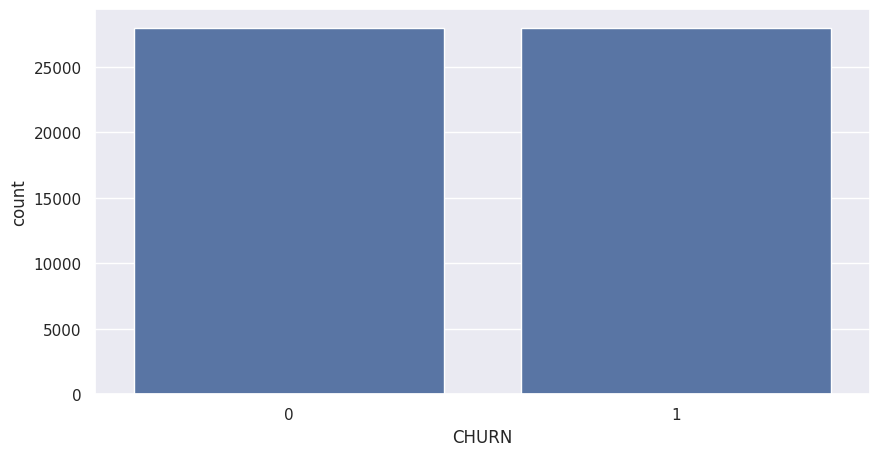

In [29]:
new_balanced_data_smote = pd.concat([X_resampled, y_resampled], axis = 1)

sns.countplot(x = new_balanced_data_smote['CHURN'])

In [30]:
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

cross_val = logreg.predict(X_resampled)
print(classification_report(cross_val, y_resampled))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77     26786
           1       0.79      0.76      0.78     29214

    accuracy                           0.77     56000
   macro avg       0.77      0.77      0.77     56000
weighted avg       0.77      0.77      0.77     56000



In [33]:
import pickle, joblib
pickle.dump(logreg, open('Expresso_Predictmodel.pkl', "wb"))